<a href="https://colab.research.google.com/github/ishaak15/UNSW-IDS-Feature-Selection/blob/main/UNSW_IDS_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
"""
Problem Statement: To develop and train a ML model which shall be able to determine an attack based on the 4 major categories

Compenents of the model:
1. IDS Dataset (UNSW NB15 used)
2. Cleaning of Dataset 
Label Encoder to encode the labels
Feature Selection that will select features as required by a category of attacks
Use of Classifiers to determine the best fitting classifier for a type of attack
__________________________
Generate a report of the features which play a major role in determining the category of attack
Generate a report of the features according to protocol which play a major role in determining the presence of an attack


#precision, recall, f1_ score, roc_curve, 
#RMSE, Performance Matrices


"""
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt
import os
import math
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_validate
from sklearn import datasets, preprocessing, feature_extraction, neighbors
from sklearn import linear_model, svm, metrics, ensemble, tree, ensemble
from sklearn.model_selection import train_test_split
from copy import copy
import urllib
import csv

import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import plotly.graph_objs as go

from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 


from sklearn.naive_bayes import GaussianNB
from yellowbrick.classifier import ClassificationReport

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression


In [ ]:
cd /

/


In [ ]:
ls

bin/      dev/     lib/    mnt/   run/   tensorflow-1.15.2/         usr/
boot/     etc/     lib32/  opt/   sbin/  tmp/                       var/
content/  gdrive/  lib64/  proc/  srv/   tools/
datalab/  home/    media/  root/  sys/   UNSW_NB15_testing-set.csv


In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


In [ ]:
cd MyDrive/Project_Dataset/


/gdrive/MyDrive/Project_Dataset


In [ ]:
ls

Dataset1.csv  Dataset3.csv               UNSW_NB15_training-set.csv
Dataset2.csv  UNSW_NB15_testing-set.csv


In [ ]:
cp UNSW_NB15_testing-set.csv /

In [ ]:
"""
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

#https://drive.google.com/file/d/1yRSDzw5qGmfaYkFA-KKwSTpSGOgMD8fe/view?usp=sharing

link = 'https://drive.google.com/open?id=1BZ-ecPHd42KBqhFfPULWWfA6s3n-tUjq' # The shareable link
"""

"\n!pip install -U -q PyDrive\nfrom pydrive.auth import GoogleAuth\nfrom pydrive.drive import GoogleDrive\nfrom google.colab import auth\nfrom oauth2client.client import GoogleCredentials\n# Authenticate and create the PyDrive client.\nauth.authenticate_user()\ngauth = GoogleAuth()\ngauth.credentials = GoogleCredentials.get_application_default()\ndrive = GoogleDrive(gauth)\n\n#https://drive.google.com/file/d/1yRSDzw5qGmfaYkFA-KKwSTpSGOgMD8fe/view?usp=sharing\n\nlink = 'https://drive.google.com/open?id=1BZ-ecPHd42KBqhFfPULWWfA6s3n-tUjq' # The shareable link\n"

In [ ]:
#fluff, id = link.split('=')
#print (id) # Verify that you have everything after '='

In [ ]:
#downloaded = drive.CreateFile({'id':id}) 
#downloaded.GetContentFile('UNSW_NB15_training-set.csv')  
df3 = pd.read_csv('UNSW_NB15_training-set.csv',index_col=0)
# Dataset is now stored in a Pandas Dataframe

In [ ]:
df3.head()

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,252,254,14158.942380,8495.365234,0,0,24.295600,8.375000,30.177547,11.830604,255,621772692,2202533631,255,0.000000,0.000000,0.000000,43,43,0,0,1,0,1,1,1,1,0,0,0,1,1,0,Normal,0
2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,62,252,8395.112305,503571.312500,2,17,49.915000,15.432865,61.426934,1387.778330,255,1417884146,3077387971,255,0.000000,0.000000,0.000000,52,1106,0,0,43,1,1,1,1,2,0,0,0,1,6,0,Normal,0
3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,62,252,1572.271851,60929.230470,1,6,231.875571,102.737203,17179.586860,11420.926230,255,2116150707,2963114973,255,0.111897,0.061458,0.050439,46,824,0,0,7,1,2,1,1,3,0,0,0,2,6,0,Normal,0
4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,62,252,2740.178955,3358.622070,1,3,152.876547,90.235726,259.080172,4991.784669,255,1107119177,1047442890,255,0.000000,0.000000,0.000000,52,64,0,0,1,1,2,1,1,3,1,1,0,2,1,0,Normal,0
5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,254,252,8561.499023,3987.059814,2,1,47.750333,75.659602,2415.837634,115.807000,255,2436137549,1977154190,255,0.128381,0.071147,0.057234,53,45,0,0,43,1,2,2,1,40,0,0,0,2,39,0,Normal,0


In [ ]:
df3.shape

(175341, 44)

In [ ]:
df3['label'].value_counts()

1    119341
0     56000
Name: label, dtype: int64

In [ ]:
df3['attack_cat'].value_counts()

Normal            56000
Generic           40000
Exploits          33393
Fuzzers           18184
DoS               12264
Reconnaissance    10491
Analysis           2000
Backdoor           1746
Shellcode          1133
Worms               130
Name: attack_cat, dtype: int64

In [ ]:
df3.columns

Index(['dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin',
       'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports', 'attack_cat', 'label'],
      dtype='object')

In [ ]:
df3.groupby(['attack_cat'])['label'].value_counts()

attack_cat      label
Analysis        1         2000
Backdoor        1         1746
DoS             1        12264
Exploits        1        33393
Fuzzers         1        18184
Generic         1        40000
Normal          0        56000
Reconnaissance  1        10491
Shellcode       1         1133
Worms           1          130
Name: label, dtype: int64

In [ ]:
df3.shape

(175341, 44)

In [ ]:
df3['state'].unique()

array(['FIN', 'INT', 'CON', 'ECO', 'REQ', 'RST', 'PAR', 'URN', 'no'],
      dtype=object)

In [ ]:
df3['service'].unique()

array(['-', 'ftp', 'smtp', 'snmp', 'http', 'ftp-data', 'dns', 'ssh',
       'radius', 'pop3', 'dhcp', 'ssl', 'irc'], dtype=object)

In [ ]:
df3['state'].unique()

array(['FIN', 'INT', 'CON', 'ECO', 'REQ', 'RST', 'PAR', 'URN', 'no'],
      dtype=object)

In [ ]:
df3.tail()

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
175337,0.000009,udp,dns,INT,2,0,114,0,111111.107200,254,0,5.066666e+07,0.000000,0,0,0.009000,0.00000,0.000000,0.000000,0,0,0,0,0.00000,0.000000,0.000000,57,0,0,0,24,2,24,24,13,24,0,0,0,24,24,0,Generic,1
175338,0.505762,tcp,-,FIN,10,8,620,354,33.612649,254,252,8.826286e+03,4903.492188,2,1,54.400111,66.98057,3721.068786,120.177727,255,3518776216,3453092386,255,0.09944,0.036895,0.062545,62,44,0,0,1,1,1,1,1,2,0,0,0,1,1,0,Shellcode,1
175339,0.000009,udp,dns,INT,2,0,114,0,111111.107200,254,0,5.066666e+07,0.000000,0,0,0.009000,0.00000,0.000000,0.000000,0,0,0,0,0.00000,0.000000,0.000000,57,0,0,0,12,2,3,3,3,13,0,0,0,3,12,0,Generic,1
175340,0.000009,udp,dns,INT,2,0,114,0,111111.107200,254,0,5.066666e+07,0.000000,0,0,0.009000,0.00000,0.000000,0.000000,0,0,0,0,0.00000,0.000000,0.000000,57,0,0,0,30,2,30,30,14,30,0,0,0,30,30,0,Generic,1
175341,0.000009,udp,dns,INT,2,0,114,0,111111.107200,254,0,5.066666e+07,0.000000,0,0,0.009000,0.00000,0.000000,0.000000,0,0,0,0,0.00000,0.000000,0.000000,57,0,0,0,30,2,30,30,16,30,0,0,0,30,30,0,Generic,1


In [ ]:
df3.groupby(['attack_cat'])['proto'].value_counts()

attack_cat      proto
Analysis        unas     700
                tcp      564
                ospf      67
                sctp      22
                any       15
                        ... 
Reconnaissance  zero       6
Shellcode       udp      576
                tcp      557
Worms           tcp      115
                udp       15
Name: proto, Length: 906, dtype: int64

In [ ]:
df3['attack_cat'].value_counts()

Normal            56000
Generic           40000
Exploits          33393
Fuzzers           18184
DoS               12264
Reconnaissance    10491
Analysis           2000
Backdoor           1746
Shellcode          1133
Worms               130
Name: attack_cat, dtype: int64

In [ ]:
df3['proto'].value_counts()

tcp       79946
udp       63283
unas      12084
arp        2859
ospf       2595
          ...  
netblt       98
egp          98
igmp         18
icmp         15
rtp           1
Name: proto, Length: 133, dtype: int64

In [ ]:
df3['service'].value_counts()

-           94168
dns         47294
http        18724
smtp         5058
ftp-data     3995
ftp          3428
ssh          1302
pop3         1105
dhcp           94
snmp           80
ssl            56
irc            25
radius         12
Name: service, dtype: int64

In [ ]:
df3['state'].value_counts()

INT    82275
FIN    77825
CON    13152
REQ     1991
RST       83
ECO       12
PAR        1
URN        1
no         1
Name: state, dtype: int64

In [ ]:
df=df3

In [ ]:
################## Encoding for the Main dataset  ##########################

le = LabelEncoder()
need_labeling = ['proto', 'service','state']

for i in need_labeling:
    le.fit(df3[i])
    df3[i] = le.transform(df3[i])
    


In [ ]:
df3.head()

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.121478,113,0,2,6,4,258,172,74.087490,252,254,14158.942380,8495.365234,0,0,24.295600,8.375000,30.177547,11.830604,255,621772692,2202533631,255,0.000000,0.000000,0.000000,43,43,0,0,1,0,1,1,1,1,0,0,0,1,1,0,Normal,0
2,0.649902,113,0,2,14,38,734,42014,78.473372,62,252,8395.112305,503571.312500,2,17,49.915000,15.432865,61.426934,1387.778330,255,1417884146,3077387971,255,0.000000,0.000000,0.000000,52,1106,0,0,43,1,1,1,1,2,0,0,0,1,6,0,Normal,0
3,1.623129,113,0,2,8,16,364,13186,14.170161,62,252,1572.271851,60929.230470,1,6,231.875571,102.737203,17179.586860,11420.926230,255,2116150707,2963114973,255,0.111897,0.061458,0.050439,46,824,0,0,7,1,2,1,1,3,0,0,0,2,6,0,Normal,0
4,1.681642,113,3,2,12,12,628,770,13.677108,62,252,2740.178955,3358.622070,1,3,152.876547,90.235726,259.080172,4991.784669,255,1107119177,1047442890,255,0.000000,0.000000,0.000000,52,64,0,0,1,1,2,1,1,3,1,1,0,2,1,0,Normal,0
5,0.449454,113,0,2,10,6,534,268,33.373826,254,252,8561.499023,3987.059814,2,1,47.750333,75.659602,2415.837634,115.807000,255,2436137549,1977154190,255,0.128381,0.071147,0.057234,53,45,0,0,43,1,2,2,1,40,0,0,0,2,39,0,Normal,0


In [ ]:
df3['attack_cat'].value_counts()

Normal            56000
Generic           40000
Exploits          33393
Fuzzers           18184
DoS               12264
Reconnaissance    10491
Analysis           2000
Backdoor           1746
Shellcode          1133
Worms               130
Name: attack_cat, dtype: int64

In [ ]:
################## Encoding for Attack Categories  ##########################

le = LabelEncoder()
need_labeling = ['attack_cat']

for i in need_labeling:
    le.fit(df3[i])
    df3[i] = le.transform(df3[i])
    

In [ ]:
df3.head()

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.121478,113,0,2,6,4,258,172,74.087490,252,254,14158.942380,8495.365234,0,0,24.295600,8.375000,30.177547,11.830604,255,621772692,2202533631,255,0.000000,0.000000,0.000000,43,43,0,0,1,0,1,1,1,1,0,0,0,1,1,0,6,0
2,0.649902,113,0,2,14,38,734,42014,78.473372,62,252,8395.112305,503571.312500,2,17,49.915000,15.432865,61.426934,1387.778330,255,1417884146,3077387971,255,0.000000,0.000000,0.000000,52,1106,0,0,43,1,1,1,1,2,0,0,0,1,6,0,6,0
3,1.623129,113,0,2,8,16,364,13186,14.170161,62,252,1572.271851,60929.230470,1,6,231.875571,102.737203,17179.586860,11420.926230,255,2116150707,2963114973,255,0.111897,0.061458,0.050439,46,824,0,0,7,1,2,1,1,3,0,0,0,2,6,0,6,0
4,1.681642,113,3,2,12,12,628,770,13.677108,62,252,2740.178955,3358.622070,1,3,152.876547,90.235726,259.080172,4991.784669,255,1107119177,1047442890,255,0.000000,0.000000,0.000000,52,64,0,0,1,1,2,1,1,3,1,1,0,2,1,0,6,0
5,0.449454,113,0,2,10,6,534,268,33.373826,254,252,8561.499023,3987.059814,2,1,47.750333,75.659602,2415.837634,115.807000,255,2436137549,1977154190,255,0.128381,0.071147,0.057234,53,45,0,0,43,1,2,2,1,40,0,0,0,2,39,0,6,0


In [ ]:
need_labeling

['attack_cat']

In [ ]:
print ("Initial Shape of Dataset:",df3.shape)

########## Dropping duplicates #########################    
df3.drop_duplicates(subset=None, keep='first', inplace=True)
print ("Shape of Dataset after dropping duplicates:",df3.shape)


Initial Shape of Dataset: (175341, 44)
Shape of Dataset after dropping duplicates: (107740, 44)


In [ ]:
x_data = df3.iloc[:,0:42]    #data
y_data = df3.iloc[:,42:44]    #target column

In [ ]:
x_data.shape

(107740, 42)

In [ ]:
#x_data.head()
y_data.head()

,attack_cat,label
id,,
1,6,0
2,6,0
3,6,0
4,6,0
5,6,0


In [ ]:
y_data['attack_cat'].count()

107740

In [ ]:
y_attack=y_data.iloc[:,-2]
print(y_attack)

id
1         6
2         6
3         6
4         6
5         6
         ..
175268    3
175278    3
175300    3
175306    3
175338    8
Name: attack_cat, Length: 107740, dtype: int64


In [ ]:
x_data.head()

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.121478,113,0,2,6,4,258,172,74.087490,252,254,14158.942380,8495.365234,0,0,24.295600,8.375000,30.177547,11.830604,255,621772692,2202533631,255,0.000000,0.000000,0.000000,43,43,0,0,1,0,1,1,1,1,0,0,0,1,1,0
2,0.649902,113,0,2,14,38,734,42014,78.473372,62,252,8395.112305,503571.312500,2,17,49.915000,15.432865,61.426934,1387.778330,255,1417884146,3077387971,255,0.000000,0.000000,0.000000,52,1106,0,0,43,1,1,1,1,2,0,0,0,1,6,0
3,1.623129,113,0,2,8,16,364,13186,14.170161,62,252,1572.271851,60929.230470,1,6,231.875571,102.737203,17179.586860,11420.926230,255,2116150707,2963114973,255,0.111897,0.061458,0.050439,46,824,0,0,7,1,2,1,1,3,0,0,0,2,6,0
4,1.681642,113,3,2,12,12,628,770,13.677108,62,252,2740.178955,3358.622070,1,3,152.876547,90.235726,259.080172,4991.784669,255,1107119177,1047442890,255,0.000000,0.000000,0.000000,52,64,0,0,1,1,2,1,1,3,1,1,0,2,1,0
5,0.449454,113,0,2,10,6,534,268,33.373826,254,252,8561.499023,3987.059814,2,1,47.750333,75.659602,2415.837634,115.807000,255,2436137549,1977154190,255,0.128381,0.071147,0.057234,53,45,0,0,43,1,2,2,1,40,0,0,0,2,39,0


In [ ]:
#X_trafrom sklearn.ensemble import ExtraTreesClassifier
#use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization


from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import make_classification
model = ExtraTreesClassifier(n_estimators=100, random_state=0)
model.fit(x_data, y_attack)
print(model.feature_importances_)

[0.01669073 0.00723724 0.05159936 0.01595261 0.01031124 0.01237194
 0.0402819  0.01500843 0.025715   0.12442526 0.10654901 0.02715767
 0.02899526 0.01018173 0.01211185 0.01733125 0.0125351  0.01437653
 0.01249849 0.01409366 0.0126094  0.01178018 0.00851924 0.01660061
 0.01774672 0.01798459 0.05561964 0.03115546 0.00578536 0.00338156
 0.03239427 0.06193009 0.0154873  0.01554778 0.0165388  0.03334201
 0.00067178 0.00049442 0.00601253 0.01707874 0.04264937 0.00124588]


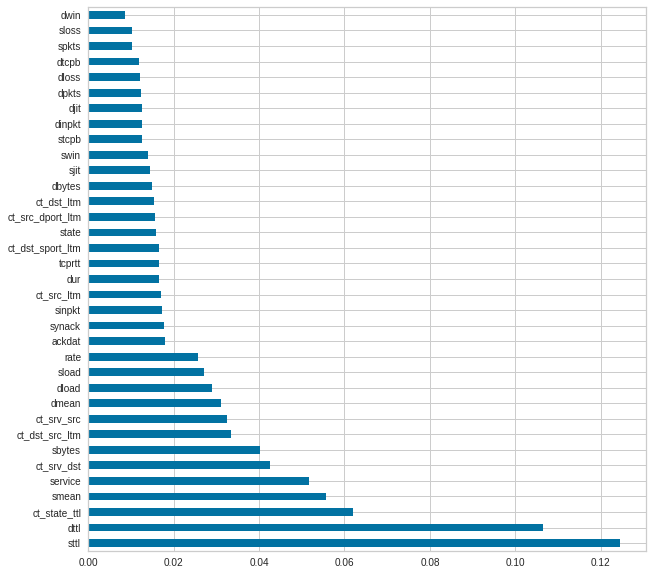

In [ ]:
plt.figure(figsize=(10,10))
feat_importances = pd.Series(model.feature_importances_, index=x_data.columns)
feat_importances.nlargest(35).plot(kind='barh')
plt.show()


In [ ]:
print((feat_importances.shape))
print(x_data.columns)
a1={}
i=0

(42,)
Index(['dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin',
       'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports'],
      dtype='object')


In [ ]:

while i<42:
  b={x_data.columns[i]:round(feat_importances[i], 4)}
  i=i+1
  a1.update(b)




s1 = [(k, a1[k]) for k in sorted(a1, key=a1.get, reverse=True)]



In [ ]:
s1


[('sttl', 0.1244),
 ('dttl', 0.1065),
 ('ct_state_ttl', 0.0619),
 ('smean', 0.0556),
 ('service', 0.0516),
 ('ct_srv_dst', 0.0426),
 ('sbytes', 0.0403),
 ('ct_dst_src_ltm', 0.0333),
 ('ct_srv_src', 0.0324),
 ('dmean', 0.0312),
 ('dload', 0.029),
 ('sload', 0.0272),
 ('rate', 0.0257),
 ('ackdat', 0.018),
 ('synack', 0.0177),
 ('sinpkt', 0.0173),
 ('ct_src_ltm', 0.0171),
 ('dur', 0.0167),
 ('tcprtt', 0.0166),
 ('ct_dst_sport_ltm', 0.0165),
 ('state', 0.016),
 ('ct_dst_ltm', 0.0155),
 ('ct_src_dport_ltm', 0.0155),
 ('dbytes', 0.015),
 ('sjit', 0.0144),
 ('swin', 0.0141),
 ('stcpb', 0.0126),
 ('dinpkt', 0.0125),
 ('djit', 0.0125),
 ('dpkts', 0.0124),
 ('dloss', 0.0121),
 ('dtcpb', 0.0118),
 ('spkts', 0.0103),
 ('sloss', 0.0102),
 ('dwin', 0.0085),
 ('proto', 0.0072),
 ('ct_flw_http_mthd', 0.006),
 ('trans_depth', 0.0058),
 ('response_body_len', 0.0034),
 ('is_sm_ips_ports', 0.0012),
 ('is_ftp_login', 0.0007),
 ('ct_ftp_cmd', 0.0005)]

In [ ]:
index=x_data.columns

In [ ]:
dataset=df3
#dataset.drop(labels=['label'])
dataset=dataset.drop(columns=['label'])


In [ ]:
print(len(dataset.columns))

43


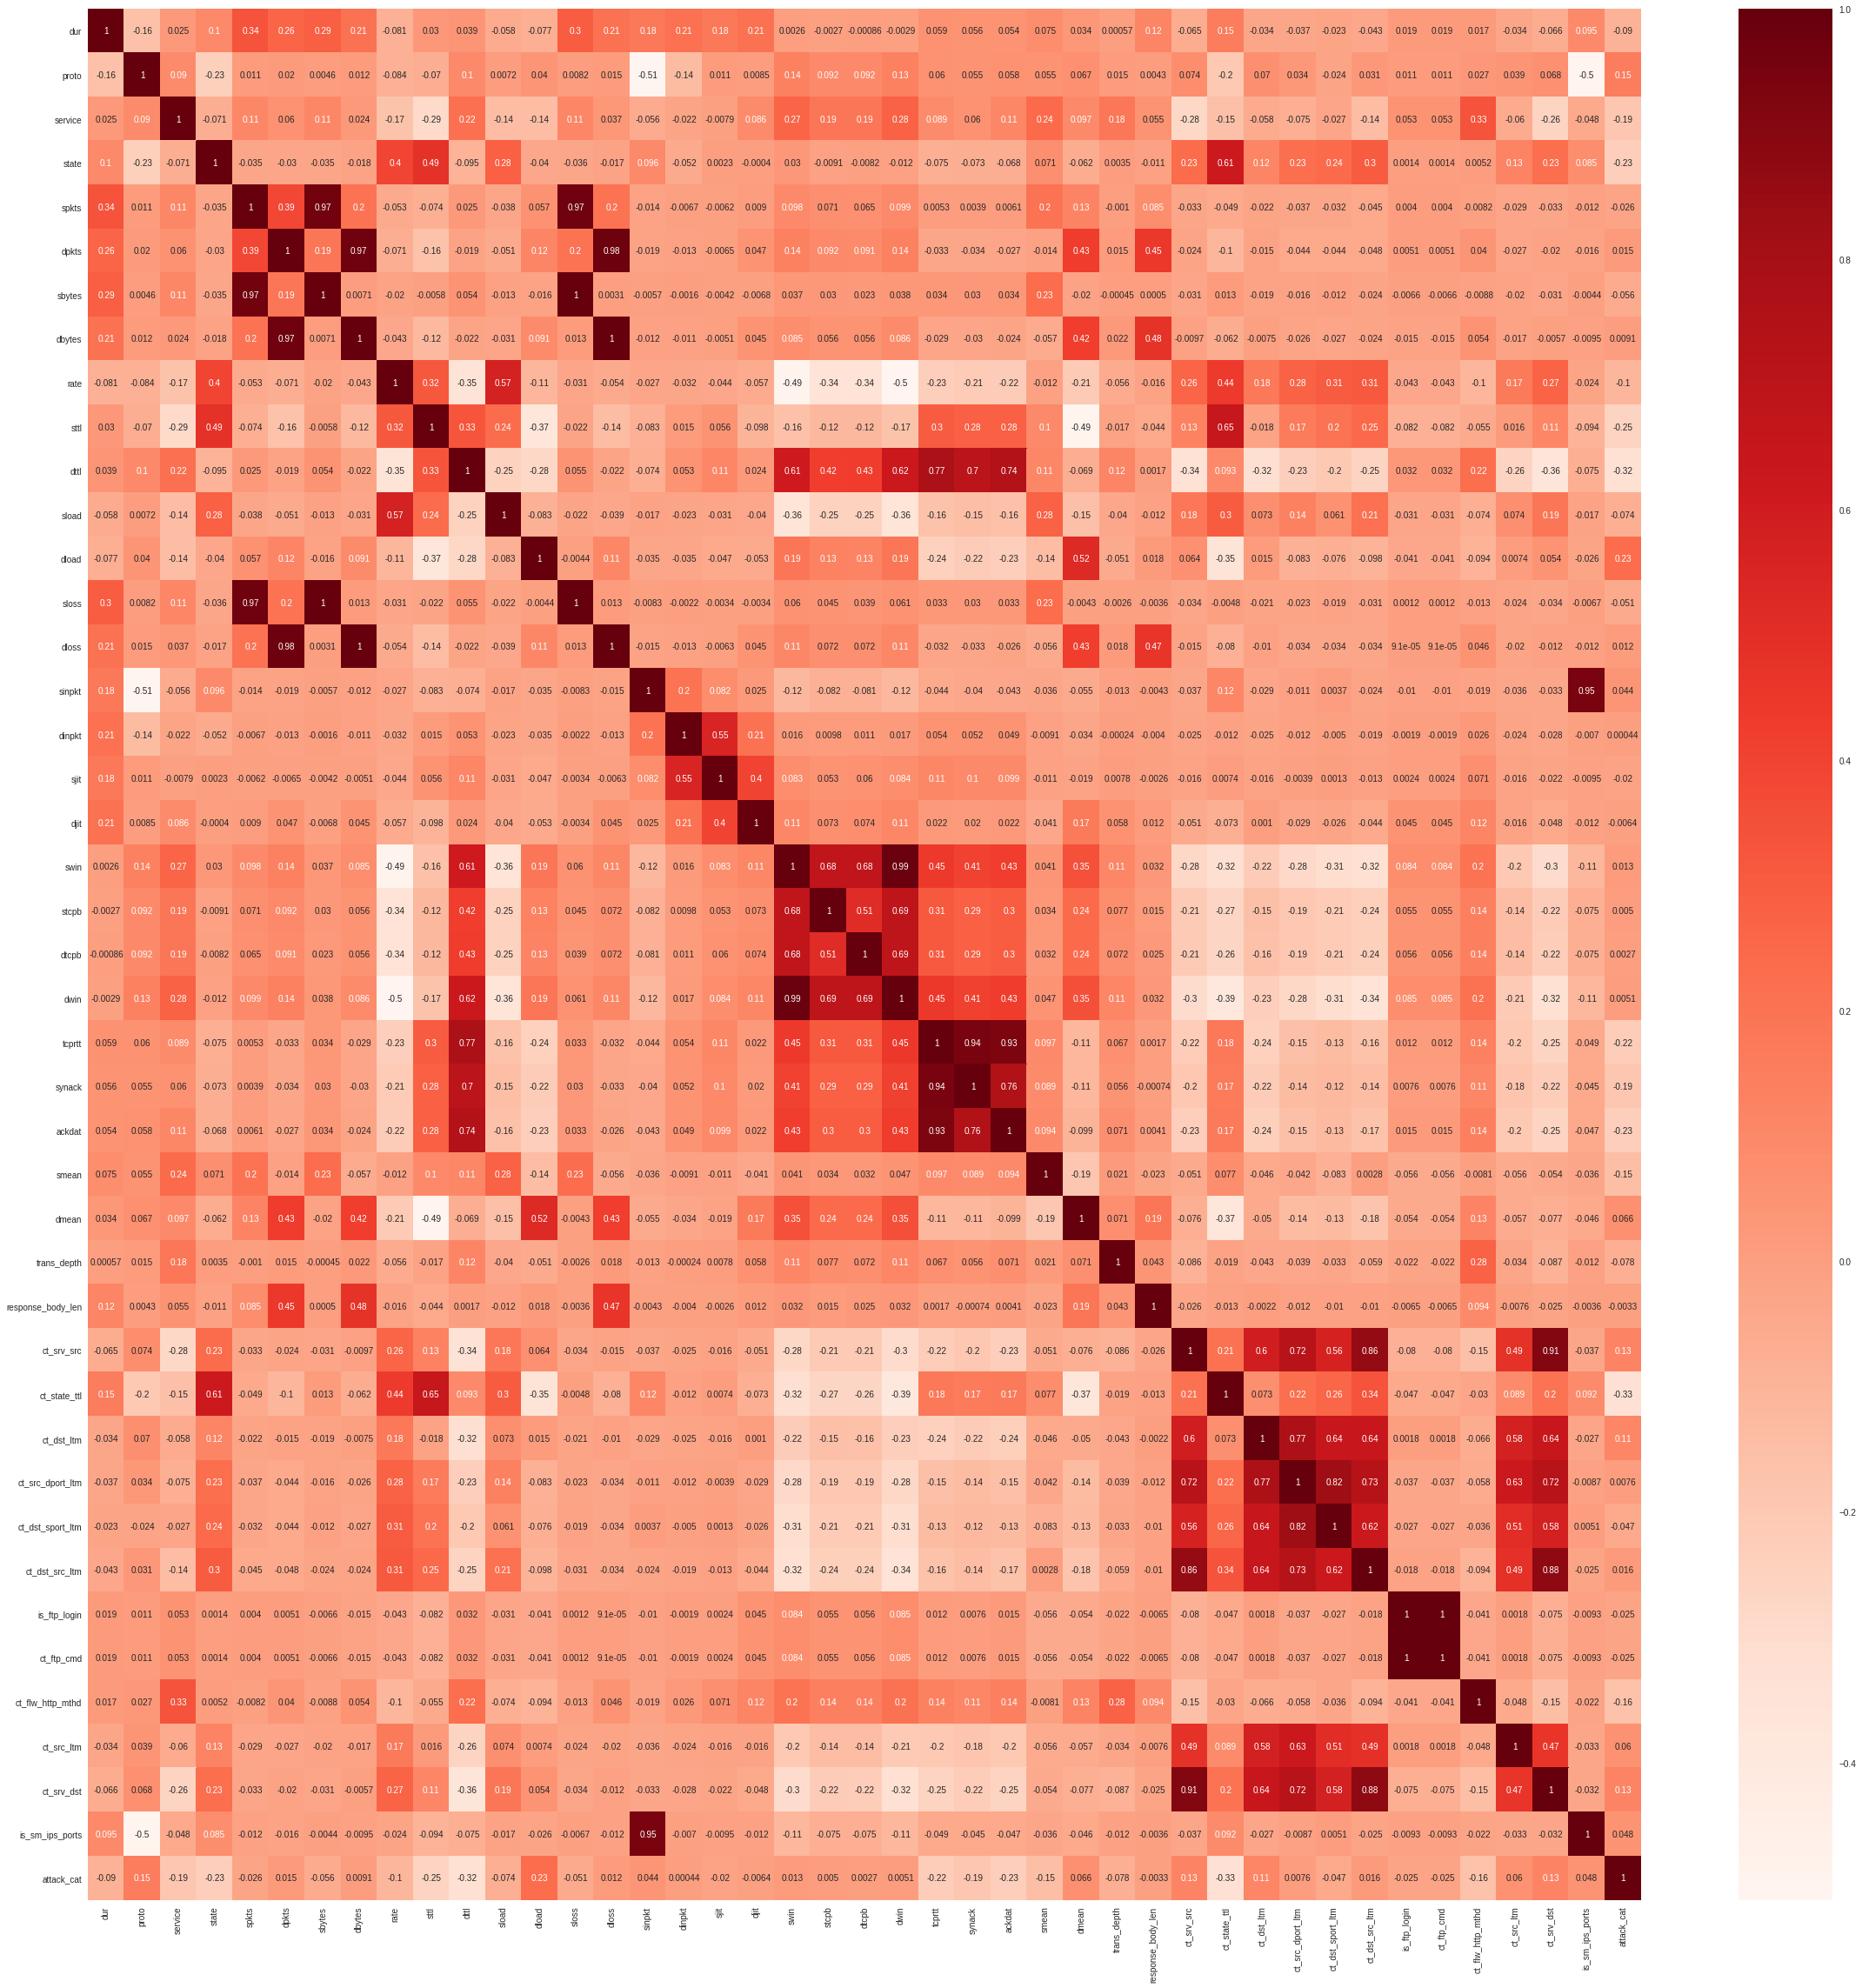

In [ ]:
#Using Pearson Correlation
corrmat = dataset.corr() #corr() calculates the correlation.
top_corr_features = corrmat.index
plt.figure(figsize=(40,40))

sns.heatmap(corrmat, annot=True, cmap=plt.cm.Reds)
plt.show()

In [ ]:
print(top_corr_features)

#Correlation with output variable
cor_target = abs(corrmat["attack_cat"])

#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.10]
#relevant_features.sort_values(ascending=False)
print (cor_target)
#cor_target.size



#cor_target


Index(['dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin',
       'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports', 'attack_cat'],
      dtype='object')
dur                  0.089626
proto                0.151913
service              0.191229
state                0.226826
spkts                0.025793
dpkts                0.015443
sbytes               0.055820
dbytes               0.009065
rate                 0.104855
sttl                 0.254655
dttl                 0.323298
sload                0.074321
dload                0.231948
sloss                0.050960


In [ ]:
import math
a2={}
i=0
while i < 42:
  
  b={dataset.columns[i]:round(cor_target[i],4)}
  x=float(cor_target[i])
  if ((math.isnan(x))==True):
    b={dataset.columns[i]:0}
    
  a2.update(b)
  i=i+1
  

#len(a2)

s2 = [(k, a2[k]) for k in sorted(a2, key=a2.get, reverse=True)]

#s2


In [ ]:
s2

[('ct_state_ttl', 0.3302),
 ('dttl', 0.3233),
 ('sttl', 0.2547),
 ('dload', 0.2319),
 ('ackdat', 0.2284),
 ('state', 0.2268),
 ('tcprtt', 0.2228),
 ('service', 0.1912),
 ('synack', 0.1907),
 ('ct_flw_http_mthd', 0.1637),
 ('proto', 0.1519),
 ('smean', 0.1478),
 ('ct_srv_dst', 0.126),
 ('ct_srv_src', 0.1254),
 ('ct_dst_ltm', 0.1122),
 ('rate', 0.1049),
 ('dur', 0.0896),
 ('trans_depth', 0.078),
 ('sload', 0.0743),
 ('dmean', 0.0664),
 ('ct_src_ltm', 0.06),
 ('sbytes', 0.0558),
 ('sloss', 0.051),
 ('is_sm_ips_ports', 0.048),
 ('ct_dst_sport_ltm', 0.0471),
 ('sinpkt', 0.0437),
 ('spkts', 0.0258),
 ('is_ftp_login', 0.0249),
 ('ct_ftp_cmd', 0.0249),
 ('sjit', 0.02),
 ('ct_dst_src_ltm', 0.0164),
 ('dpkts', 0.0154),
 ('swin', 0.0132),
 ('dloss', 0.0121),
 ('dbytes', 0.0091),
 ('ct_src_dport_ltm', 0.0076),
 ('djit', 0.0064),
 ('dwin', 0.0051),
 ('stcpb', 0.005),
 ('response_body_len', 0.0033),
 ('dtcpb', 0.0027),
 ('dinpkt', 0.0004)]

In [ ]:
y_attack.head()

id
1    6
2    6
3    6
4    6
5    6
Name: attack_cat, dtype: int64

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2





#apply SelectKBest class to extract top 20 best features
bestfeatures = SelectKBest(score_func=chi2, k=42)


fit = bestfeatures.fit(x_data, y_attack)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x_data.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Columns','Score']  #naming the dataframe columns

print(featureScores.nlargest(42,'Score')) 

xp=featureScores.nlargest(10,'Score')

feature=fit.transform(x_data)


#print (featureScores)



              Columns         Score
21              dtcpb  9.847500e+12
20              stcpb  9.612634e+12
11              sload  4.447713e+12
12              dload  1.178523e+11
8                rate  5.600370e+09
6              sbytes  2.467522e+09
7              dbytes  1.057710e+09
29  response_body_len  2.278372e+08
17               sjit  2.129132e+08
15             sinpkt  2.376069e+07
18               djit  1.872634e+07
27              dmean  6.128519e+06
9                sttl  4.318563e+06
10               dttl  4.140455e+06
26              smean  2.140081e+06
16             dinpkt  2.027370e+06
19               swin  1.150084e+06
22               dwin  1.148613e+06
5               dpkts  9.243387e+05
4               spkts  7.696853e+05
13              sloss  6.536890e+05
14              dloss  4.096507e+05
35     ct_dst_src_ltm  3.408657e+05
40         ct_srv_dst  2.976115e+05
30         ct_srv_src  2.708259e+05
33   ct_src_dport_ltm  2.544930e+05
34   ct_dst_sport_ltm  1.875

In [ ]:
print (type(featureScores))

b=dfscores.iloc[0]

print (dfscores.values.tolist())
bx=dfscores.values.tolist()

i=0
score=[]
for x in bx:
  g=x[0]
  if ((math.isnan(x[0]))==True):
    g=0
    
    
  score.append(round(g))  
  i=i+1
    

<class 'pandas.core.frame.DataFrame'>
[[27146.274645877642], [14363.784171009293], [89288.0643359471], [7616.99727126291], [769685.3232824199], [924338.7157387076], [2467521640.575214], [1057710094.3879056], [5600369836.617307], [4318563.211528959], [4140455.013846636], [4447712826756.192], [117852282957.30272], [653689.0156395118], [409650.7309011841], [23760686.952828586], [2027369.7110122326], [212913200.66413862], [18726340.139047317], [1150084.3681268776], [9612633946996.438], [9847499720825.059], [1148612.9238672582], [2279.8080042160886], [1051.5090447062644], [1254.4084903032333], [2140081.479270043], [6128519.375412145], [11983.57392795797], [227837167.0470371], [270825.8546858069], [30796.600723572796], [154178.00116430502], [254493.01037013592], [187508.7351915037], [340865.68736113905], [913.4571886430954], [913.4571886430954], [12931.79911972998], [105285.27552599594], [297611.5149350749], [586.5918288687609]]


In [ ]:
a3={}
i=0
while i < 42:
  
  b={x_data.columns[i]:score[i]}
  a3.update(b)
  i=i+1

s3 = [(k, a3[k]) for k in sorted(a3, key=a3.get, reverse=True)]


In [ ]:
s3

[('dtcpb', 9847499720825),
 ('stcpb', 9612633946996),
 ('sload', 4447712826756),
 ('dload', 117852282957),
 ('rate', 5600369837),
 ('sbytes', 2467521641),
 ('dbytes', 1057710094),
 ('response_body_len', 227837167),
 ('sjit', 212913201),
 ('sinpkt', 23760687),
 ('djit', 18726340),
 ('dmean', 6128519),
 ('sttl', 4318563),
 ('dttl', 4140455),
 ('smean', 2140081),
 ('dinpkt', 2027370),
 ('swin', 1150084),
 ('dwin', 1148613),
 ('dpkts', 924339),
 ('spkts', 769685),
 ('sloss', 653689),
 ('dloss', 409651),
 ('ct_dst_src_ltm', 340866),
 ('ct_srv_dst', 297612),
 ('ct_srv_src', 270826),
 ('ct_src_dport_ltm', 254493),
 ('ct_dst_sport_ltm', 187509),
 ('ct_dst_ltm', 154178),
 ('ct_src_ltm', 105285),
 ('service', 89288),
 ('ct_state_ttl', 30797),
 ('dur', 27146),
 ('proto', 14364),
 ('ct_flw_http_mthd', 12932),
 ('trans_depth', 11984),
 ('state', 7617),
 ('tcprtt', 2280),
 ('ackdat', 1254),
 ('synack', 1052),
 ('is_ftp_login', 913),
 ('ct_ftp_cmd', 913),
 ('is_sm_ips_ports', 587)]

In [ ]:
len(s3)

42

In [ ]:
"""model = LogisticRegression(multi_class='auto', solver='saga') 

rfe = RFE(model, n_features_to_select=25)

fit = rfe.fit(x_data, y_attack)

print("Num Features: %d"% fit.n_features_) 
print("Selected Features: %s"% fit.support_) 
print("Feature Ranking: %s"% fit.ranking_)
"""

'model = LogisticRegression(multi_class=\'auto\', solver=\'saga\') \n\nrfe = RFE(model, n_features_to_select=25)\n\nfit = rfe.fit(x_data, y_attack)\n\nprint("Num Features: %d"% fit.n_features_) \nprint("Selected Features: %s"% fit.support_) \nprint("Feature Ranking: %s"% fit.ranking_)\n'

In [ ]:
"""
print("Num Features: %d"% fit.n_features_) 
print("Selected Features: %s"% fit.support_) 
print("Feature Ranking: %s"% fit.ranking_)


"""

'\nprint("Num Features: %d"% fit.n_features_) \nprint("Selected Features: %s"% fit.support_) \nprint("Feature Ranking: %s"% fit.ranking_)\n\n\n'

In [ ]:
r1={}
i=0
while i<42:
  b={s1[i][0]:i}
  r1.update(b)
  i=i+1

len(r1)

#s1[0][0]

#s1[2]

r2={}
i=0

while i<42:
  b={s2[i][0]:i}
  r2.update(b)
  i=i+1

r3={}
i=0

while i<42:
  b={s3[i][0]:i}
  r3.update(b)
  i=i+1

print("\n\nR1\n")
for x in r1:
  print (x)
print("\n\nR2\n")
for x in r2:
  print (x)
print("\n\nR3\n")
for x in r3:
  print (x)




R1

sttl
dttl
ct_state_ttl
smean
service
ct_srv_dst
sbytes
ct_dst_src_ltm
ct_srv_src
dmean
dload
sload
rate
ackdat
synack
sinpkt
ct_src_ltm
dur
tcprtt
ct_dst_sport_ltm
state
ct_dst_ltm
ct_src_dport_ltm
dbytes
sjit
swin
stcpb
dinpkt
djit
dpkts
dloss
dtcpb
spkts
sloss
dwin
proto
ct_flw_http_mthd
trans_depth
response_body_len
is_sm_ips_ports
is_ftp_login
ct_ftp_cmd


R2

ct_state_ttl
dttl
sttl
dload
ackdat
state
tcprtt
service
synack
ct_flw_http_mthd
proto
smean
ct_srv_dst
ct_srv_src
ct_dst_ltm
rate
dur
trans_depth
sload
dmean
ct_src_ltm
sbytes
sloss
is_sm_ips_ports
ct_dst_sport_ltm
sinpkt
spkts
is_ftp_login
ct_ftp_cmd
sjit
ct_dst_src_ltm
dpkts
swin
dloss
dbytes
ct_src_dport_ltm
djit
dwin
stcpb
response_body_len
dtcpb
dinpkt


R3

dtcpb
stcpb
sload
dload
rate
sbytes
dbytes
response_body_len
sjit
sinpkt
djit
dmean
sttl
dttl
smean
dinpkt
swin
dwin
dpkts
spkts
sloss
dloss
ct_dst_src_ltm
ct_srv_dst
ct_srv_src
ct_src_dport_ltm
ct_dst_sport_ltm
ct_dst_ltm
ct_src_ltm
service
ct_state_ttl
dur
p

In [ ]:
avg={}
for i in r1:
  a=(r1[i]+r2[i]+r3[i])/3.0
  b={i:a}
  avg.update(b)

print(avg)

{'sttl': 4.666666666666667, 'dttl': 5.0, 'ct_state_ttl': 10.666666666666666, 'smean': 9.333333333333334, 'service': 13.333333333333334, 'ct_srv_dst': 13.333333333333334, 'sbytes': 10.666666666666666, 'ct_dst_src_ltm': 19.666666666666668, 'ct_srv_src': 15.0, 'dmean': 13.0, 'dload': 5.333333333333333, 'sload': 10.333333333333334, 'rate': 10.333333333333334, 'ackdat': 18.0, 'synack': 20.0, 'sinpkt': 16.333333333333332, 'ct_src_ltm': 21.333333333333332, 'dur': 21.333333333333332, 'tcprtt': 20.0, 'ct_dst_sport_ltm': 23.0, 'state': 20.0, 'ct_dst_ltm': 20.666666666666668, 'ct_src_dport_ltm': 27.333333333333332, 'dbytes': 21.0, 'sjit': 20.333333333333332, 'swin': 24.333333333333332, 'stcpb': 21.666666666666668, 'dinpkt': 27.666666666666668, 'djit': 24.666666666666668, 'dpkts': 26.0, 'dloss': 28.0, 'dtcpb': 23.666666666666668, 'spkts': 25.666666666666668, 'sloss': 25.0, 'dwin': 29.333333333333332, 'proto': 25.666666666666668, 'ct_flw_http_mthd': 26.0, 'trans_depth': 29.333333333333332, 'respons

In [ ]:
import collections
sorted_x = sorted(avg.items(), key=lambda kv: kv[1])

In [ ]:
sec1=[]
for i in range(0,15):
  print(sorted_x[i][0],end=",")
  sec1.append(sorted_x[i][0])

sttl,dttl,dload,smean,sload,rate,ct_state_ttl,sbytes,dmean,service,ct_srv_dst,ct_srv_src,sinpkt,ackdat,ct_dst_src_ltm,

In [ ]:
sec1

['sttl',
 'dttl',
 'dload',
 'smean',
 'sload',
 'rate',
 'ct_state_ttl',
 'sbytes',
 'dmean',
 'service',
 'ct_srv_dst',
 'ct_srv_src',
 'sinpkt',
 'ackdat',
 'ct_dst_src_ltm']

In [ ]:
sec2=[]
for i in range(0,30):
  print(sorted_x[i][0],end=",")
  sec2.append(sorted_x[i][0])

sttl,dttl,dload,smean,sload,rate,ct_state_ttl,sbytes,dmean,service,ct_srv_dst,ct_srv_src,sinpkt,ackdat,ct_dst_src_ltm,synack,tcprtt,state,sjit,ct_dst_ltm,dbytes,ct_src_ltm,dur,stcpb,ct_dst_sport_ltm,dtcpb,swin,djit,sloss,spkts,

In [ ]:
sec3=[]
for i in range(0,42):
  print(sorted_x[i][0],end=",")
  sec3.append(sorted_x[i][0])

sttl,dttl,dload,smean,sload,rate,ct_state_ttl,sbytes,dmean,service,ct_srv_dst,ct_srv_src,sinpkt,ackdat,ct_dst_src_ltm,synack,tcprtt,state,sjit,ct_dst_ltm,dbytes,ct_src_ltm,dur,stcpb,ct_dst_sport_ltm,dtcpb,swin,djit,sloss,spkts,proto,dpkts,ct_flw_http_mthd,ct_src_dport_ltm,dinpkt,dloss,response_body_len,dwin,trans_depth,is_sm_ips_ports,is_ftp_login,ct_ftp_cmd,

In [ ]:
len(sorted_x)

42

In [ ]:
sec1.append('attack_cat')

In [ ]:
print(sec1)

['sttl', 'dttl', 'dload', 'smean', 'sload', 'rate', 'ct_state_ttl', 'sbytes', 'dmean', 'service', 'ct_srv_dst', 'ct_srv_src', 'sinpkt', 'ackdat', 'ct_dst_src_ltm', 'attack_cat']


In [ ]:
sec2.append('attack_cat')
print(sec2)

['sttl', 'dttl', 'dload', 'smean', 'sload', 'rate', 'ct_state_ttl', 'sbytes', 'dmean', 'service', 'ct_srv_dst', 'ct_srv_src', 'sinpkt', 'ackdat', 'ct_dst_src_ltm', 'synack', 'tcprtt', 'state', 'sjit', 'ct_dst_ltm', 'dbytes', 'ct_src_ltm', 'dur', 'stcpb', 'ct_dst_sport_ltm', 'dtcpb', 'swin', 'djit', 'sloss', 'spkts', 'attack_cat']


In [ ]:
sec3.append('attack_cat')
print(sec3)

['sttl', 'dttl', 'dload', 'smean', 'sload', 'rate', 'ct_state_ttl', 'sbytes', 'dmean', 'service', 'ct_srv_dst', 'ct_srv_src', 'sinpkt', 'ackdat', 'ct_dst_src_ltm', 'synack', 'tcprtt', 'state', 'sjit', 'ct_dst_ltm', 'dbytes', 'ct_src_ltm', 'dur', 'stcpb', 'ct_dst_sport_ltm', 'dtcpb', 'swin', 'djit', 'sloss', 'spkts', 'proto', 'dpkts', 'ct_flw_http_mthd', 'ct_src_dport_ltm', 'dinpkt', 'dloss', 'response_body_len', 'dwin', 'trans_depth', 'is_sm_ips_ports', 'is_ftp_login', 'ct_ftp_cmd', 'attack_cat']


In [ ]:
len(sec3)

43

In [ ]:
dataset1=df[sec1]
dataset2=df[sec2]
dataset3=df[sec3]

In [ ]:
dataset1.to_csv("Dataset1.csv")
dataset2.to_csv("Dataset2.csv")
dataset3.to_csv("Dataset3.csv")

In [ ]:
ls

Dataset1.csv  Dataset3.csv               UNSW_NB15_training-set.csv
Dataset2.csv  UNSW_NB15_testing-set.csv


In [ ]:
pwd

'/gdrive/My Drive/Project_Dataset'

In [ ]:
df_test = pd.read_csv('UNSW_NB15_testing-set.csv',index_col=0)

In [ ]:
df_test.head()

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.000011,udp,-,INT,2,0,496,0,90909.0902,254,0,180363632.0,0.0,0,0,0.011,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,248,0,0,0,2,2,1,1,1,2,0,0,0,1,2,0,Normal,0
2,0.000008,udp,-,INT,2,0,1762,0,125000.0003,254,0,881000000.0,0.0,0,0,0.008,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,881,0,0,0,2,2,1,1,1,2,0,0,0,1,2,0,Normal,0
3,0.000005,udp,-,INT,2,0,1068,0,200000.0051,254,0,854400000.0,0.0,0,0,0.005,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,534,0,0,0,3,2,1,1,1,3,0,0,0,1,3,0,Normal,0
4,0.000006,udp,-,INT,2,0,900,0,166666.6608,254,0,600000000.0,0.0,0,0,0.006,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,450,0,0,0,3,2,2,2,1,3,0,0,0,2,3,0,Normal,0
5,0.000010,udp,-,INT,2,0,2126,0,100000.0025,254,0,850400000.0,0.0,0,0,0.010,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,1063,0,0,0,3,2,2,2,1,3,0,0,0,2,3,0,Normal,0


In [ ]:
df_test.columns

Index(['dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin',
       'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports', 'attack_cat', 'label'],
      dtype='object')

In [ ]:
df_test.groupby(['attack_cat'])['label'].value_counts()

attack_cat      label
Analysis        1          677
Backdoor        1          583
DoS             1         4089
Exploits        1        11132
Fuzzers         1         6062
Generic         1        18871
Normal          0        37000
Reconnaissance  1         3496
Shellcode       1          378
Worms           1           44
Name: label, dtype: int64

In [ ]:
################# Encoding for the Test dataset  ##########################

le = LabelEncoder()
need_labeling = ['proto', 'service','state']

for i in need_labeling:
    le.fit(df_test[i])
    df_test[i] = le.transform(df_test[i])
    
df_test.head()


,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.000011,117,0,4,2,0,496,0,90909.0902,254,0,180363632.0,0.0,0,0,0.011,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,248,0,0,0,2,2,1,1,1,2,0,0,0,1,2,0,Normal,0
2,0.000008,117,0,4,2,0,1762,0,125000.0003,254,0,881000000.0,0.0,0,0,0.008,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,881,0,0,0,2,2,1,1,1,2,0,0,0,1,2,0,Normal,0
3,0.000005,117,0,4,2,0,1068,0,200000.0051,254,0,854400000.0,0.0,0,0,0.005,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,534,0,0,0,3,2,1,1,1,3,0,0,0,1,3,0,Normal,0
4,0.000006,117,0,4,2,0,900,0,166666.6608,254,0,600000000.0,0.0,0,0,0.006,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,450,0,0,0,3,2,2,2,1,3,0,0,0,2,3,0,Normal,0
5,0.000010,117,0,4,2,0,2126,0,100000.0025,254,0,850400000.0,0.0,0,0,0.010,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,1063,0,0,0,3,2,2,2,1,3,0,0,0,2,3,0,Normal,0


In [ ]:
df_test['attack_cat'].value_counts()

Normal            37000
Generic           18871
Exploits          11132
Fuzzers            6062
DoS                4089
Reconnaissance     3496
Analysis            677
Backdoor            583
Shellcode           378
Worms                44
Name: attack_cat, dtype: int64

In [ ]:
################## Encoding for Attack Categories  ##########################

le = LabelEncoder()
need_labeling = ['attack_cat']

for i in need_labeling:
    le.fit(df_test[i])
    df_test[i] = le.transform(df_test[i])
    
df_test.head()


,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.000011,117,0,4,2,0,496,0,90909.0902,254,0,180363632.0,0.0,0,0,0.011,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,248,0,0,0,2,2,1,1,1,2,0,0,0,1,2,0,6,0
2,0.000008,117,0,4,2,0,1762,0,125000.0003,254,0,881000000.0,0.0,0,0,0.008,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,881,0,0,0,2,2,1,1,1,2,0,0,0,1,2,0,6,0
3,0.000005,117,0,4,2,0,1068,0,200000.0051,254,0,854400000.0,0.0,0,0,0.005,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,534,0,0,0,3,2,1,1,1,3,0,0,0,1,3,0,6,0
4,0.000006,117,0,4,2,0,900,0,166666.6608,254,0,600000000.0,0.0,0,0,0.006,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,450,0,0,0,3,2,2,2,1,3,0,0,0,2,3,0,6,0
5,0.000010,117,0,4,2,0,2126,0,100000.0025,254,0,850400000.0,0.0,0,0,0.010,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,1063,0,0,0,3,2,2,2,1,3,0,0,0,2,3,0,6,0


In [ ]:
testSec1=df_test[sec1]
testSec2=df_test[sec2]
testSec3=df_test[sec3]

In [ ]:
testSec1.to_csv("Testset1.csv")
testSec2.to_csv("Testset2.csv")
testSec3.to_csv("Testset3.csv")